In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import csv
import pandas as pd

In [4]:
df = pd.read_csv('prec_rec.csv')

,iter,thresholded?,threshold,precision,recall
0,0,1,0.000000e+00,0.079435,1.000000
1,0,1,2.298415e-27,0.079576,1.000000
2,0,1,6.190217e-25,0.079646,1.000000
3,0,1,6.063114e-22,0.079717,1.000000
4,0,1,3.649673e-19,0.079787,1.000000
...,...,...,...,...,...
9866,4,1,9.999752e-01,0.924528,0.544444
9867,4,1,9.999880e-01,0.942308,0.544444
9868,4,1,9.999977e-01,0.941176,0.533333
9869,4,1,9.999978e-01,0.940000,0.522222


Precision is above 0.3 with threshold above 0.014
Recall is above 0.95 with threshold below 0.000
Gap to bridge is  0.014


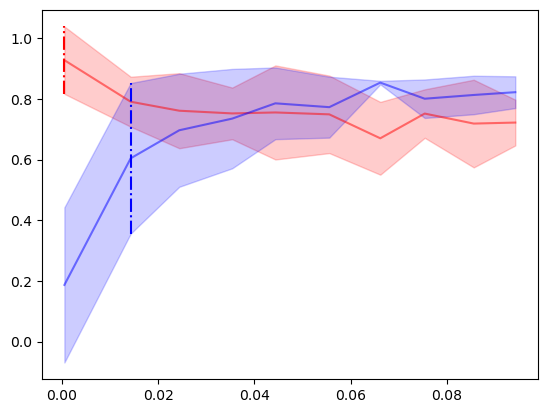

In [95]:
processed = (df['thresholded?']==1)
bins = pd.cut(df["threshold"], np.arange(0, 0.11, 0.01))

thr = df[processed].groupby(bins).mean()['threshold']

rec = df[processed].groupby(bins).mean()['recall']
rec_std = df[processed].groupby(bins).std()['recall']
rec_upper = rec+1.96*rec_std
rec_lower = rec-1.96*rec_std
idx_rec = [i for i in range (len(rec)) if rec_lower.iloc[i]>0.95]
if idx_rec:
    rec_th_idx = idx_rec[0]
else:
    rec_thr_idx = 0

prec = df[processed].groupby(bins).mean()['precision']
prec_std = df[processed].groupby(bins).std()['precision']
prec_upper = prec+1.96*prec_std
prec_lower = prec-1.96*prec_std
idx_prec = [i for i in range (len(prec)) if prec_lower.iloc[i]>0.3]
if idx_prec:
    prec_thr_idx = idx_prec[0]
else:
    prec_thr_idx = 0

fig, ax = plt.subplots()
ax.plot(thr, rec, color = 'red', alpha = 0.5)
ax.fill_between(thr, rec_upper, rec_lower, color='red', alpha=.2)
ax.vlines(x = thr.iloc[rec_thr_idx],
          color = 'r',
          ymin = rec_lower.iloc[rec_thr_idx],
          ymax = rec_upper.iloc[rec_thr_idx],
          linestyles='-.')

ax.plot(thr, prec, color = 'blue', alpha = 0.5)
ax.fill_between(thr, prec_upper, prec_lower, color='blue', alpha=.2)
ax.vlines(x = thr.iloc[prec_thr_idx],
          color = 'b',
          ymin = prec_lower.iloc[prec_thr_idx],
          ymax = prec_upper.iloc[prec_thr_idx],
          linestyles='-.')

print(f"Precision is above 0.3 with threshold above {thr.iloc[prec_thr_idx]:.3f}")
print(f"Recall is above 0.95 with threshold below {thr.iloc[rec_thr_idx]:.3f}")
print(f"Gap to bridge is  {thr.iloc[prec_thr_idx]-thr.iloc[rec_thr_idx]:.3f}")

Precision is above 0.3 with threshold above 0.046
Recall is above 0.95 with threshold below 0.001
Gap to bridge is  0.045


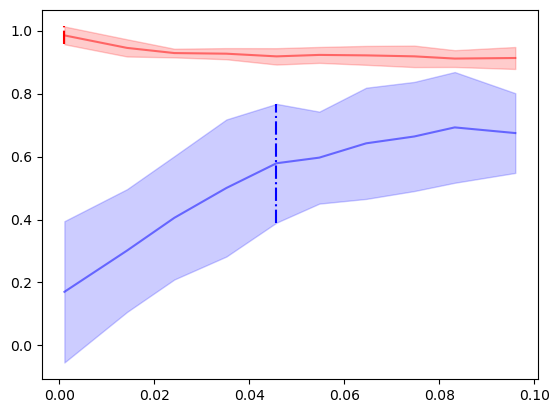

In [96]:
processed = (df['thresholded?']==0)
bins = pd.cut(df["threshold"], np.arange(0, 0.11, 0.01))

thr = df[processed].groupby(bins).mean()['threshold']

rec = df[processed].groupby(bins).mean()['recall']
rec_std = df[processed].groupby(bins).std()['recall']
rec_upper = rec+1.96*rec_std
rec_lower = rec-1.96*rec_std
idx_rec = [i for i in range (len(rec)) if rec_lower.iloc[i]>0.95]
if idx_rec:
    rec_th_idx = idx_rec[0]
else:
    rec_thr_idx = 0

prec = df[processed].groupby(bins).mean()['precision']
prec_std = df[processed].groupby(bins).std()['precision']
prec_upper = prec+1.96*prec_std
prec_lower = prec-1.96*prec_std
idx_prec = [i for i in range (len(prec)) if prec_lower.iloc[i]>0.3]
if idx_prec:
    prec_thr_idx = idx_prec[0]
else:
    prec_thr_idx = 0

fig, ax = plt.subplots()
ax.plot(thr, rec, color = 'red', alpha = 0.5)
ax.fill_between(thr, rec_upper, rec_lower, color='red', alpha=.2)
ax.vlines(x = thr.iloc[rec_thr_idx],
          color = 'r',
          ymin = rec_lower.iloc[rec_thr_idx],
          ymax = rec_upper.iloc[rec_thr_idx],
          linestyles='-.')

ax.plot(thr, prec, color = 'blue', alpha = 0.5)
ax.fill_between(thr, prec_upper, prec_lower, color='blue', alpha=.2)
ax.vlines(x = thr.iloc[prec_thr_idx],
          color = 'b',
          ymin = prec_lower.iloc[prec_thr_idx],
          ymax = prec_upper.iloc[prec_thr_idx],
          linestyles='-.')

print(f"Precision is above 0.3 with threshold above {thr.iloc[prec_thr_idx]:.3f}")
print(f"Recall is above 0.95 with threshold below {thr.iloc[rec_thr_idx]:.3f}")
print(f"Gap to bridge is  {thr.iloc[prec_thr_idx]-thr.iloc[rec_thr_idx]:.3f}")